# Testing axisymmetric shallow water code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc as rc
%matplotlib inline
from shallowwater import R1

In [5]:
# Shallow water system with radius of 10,000 km, coriolis parameters 10^-4, and depth 10 km
# 1000 grid points
sws = R1(2e7, 2000, 1e-4, 1e4)

(-10000.0, 500000.0)

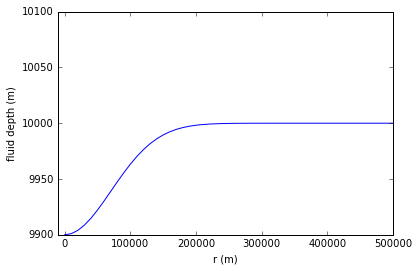

In [6]:
# Set initial conditions
sws.hvr[:] = 0.
sws.hvt[:] = 0.
sws.h[:] = sws.H0 - 100 * np.exp(-(sws.g.xq/1e5)**2)
plt.figure()
sws.ploth()
plt.ylim([9900, 10100])
plt.xlim([-1e4, 5e5])

In [ ]:
# Run several time steps
dt = 1. # 1 second time step
rdamp = 9e6 # Damp outside of 9000 km
dampr = 1e6 # Increase damping over scale of 1000 km
dampt = 3600. # Timescale of maximum damping: 1 hour

# Height
fig = plt.figure(figsize = (15, 15))
plt.subplot(321)
l1 = sws.ploth()
plt.ylim([9900, 10100])
plt.xlim([-1e4, 5e5])
plt.subplot(322)
l2 = sws.plotht()
plt.ylim([-1, 1])
plt.xlim([-1e4, 5e5])

# Radial transport
plt.subplot(323)
l3 = sws.plothvr()
plt.ylim([-15000, 15000])
plt.xlim([-1e4, 5e5])
plt.subplot(324)
l4 = sws.plothvrt()
plt.ylim([-50, 50])
plt.xlim([-1e4, 5e5])

# Azimuthal transport
plt.subplot(325)
l5 = sws.plothvt()
plt.ylim([-1000, 1000])
plt.xlim([-1e4, 5e5])
plt.subplot(326)
l6 = sws.plothvtt()
plt.ylim([-1, 1])
plt.xlim([-1e4, 5e5])

def animate(ii):
    # Step
    sws.rotate()
    sws.zero()
    sws.advection()
    sws.coriolis()
    sws.heightgrad()
    sws.forcing()
    sws.damping(rdamp, dampt, dampr)
    sws.step(dt)
    
    l1.set_ydata(sws.get_h())
    l2.set_ydata(sws.get_ht())
    l3.set_ydata(sws.get_hvr())
    l4.set_ydata(sws.get_hvrt())
    l5.set_ydata(sws.get_hvt())
    l6.set_ydata(sws.get_hvtt())
    
ani = animation.FuncAnimation(fig, animate, range(1000))
rc('animation', writer = 'mencoder')
ani.save('low_f.mp4', fps = 24, extra_args = ['-ovc', 'x264'])
os.system('HandBrakeCLI -i low_f.mp4 -o low_f_web.mp4 --preset="Very Fast 1080p30"')